# **Project Name**    - Netflix TV Shows and Movies Clustering



##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Submitted by**    - Aarav Panchal


# **Project Summary -**

We have the data of previous TED talk events , which contains data points such as the length (duration ) of the talk, topics , speaker occupation and textual features such as Transcript , Title , and Description And most importantly , the target variable : the view of the video The Data is available for 4005 TED talks .

Dataset info:

Number of records: 4,005

Number of attributes: 19

Features information:

The dataset contains features like:

talk_id: Talk identification number provided by TED.

title: Title of the talk

speaker_1: First speaker in TED's speaker list

all_speakers: Speakers in the talk.

occupations: Occupations of the speakers

about_speakers: Blurb about each speaker

recorded_date: Date the talk was recorded

published_date: Date the talk was published to TED.com

event: Event or medium in which the talk was given

native_lang: Language the talk was given in

available_lang: All available languages (lang_code) for a talk

comments: Count of comments

duration: Duration in seconds

topics: Related tags or topics for the talk

related_talks: Related talks (key='talk_id',value='title')

url: URL of the talk

description: Description of the talk

transcript: Full transcript of the talk

Target Variable :

views: Contains Count of views of every talk

Approach taken :

The task was divided into 2 main parts :

Statistical Analysis over the dataset to discover relationships between each feature and the target variable . So that this relationship information can be used by the management in making better Business decisions

Creating a Machine Learning Pipeline , that can take in the data of any new video and predict how many views it will generate on a daily basis .It was required to kepp this pipeline modular , such that it can be retrained often when new data is collected

Project Work flow

Importing Libraries

Loading the dataset

Data Cleaning

EDA on features

Feature selection

Fitting the regression models

HyperParameter Tuning

Evaluation Metrices of the model

Final selection of the model

Conclusion

Technical Details for ML :
We used two Algorithms ( Random Forest and XGBoost) We used RamdomSearchCV for HyperParameter Tuning Comparing both R2 Score , we can see that Random Forrest and XGBoost model performs the best.

Technical Insights from exploring the Data :
● For the ML Pipeline , the XGBoost Model performed the best
  Feature Engineering and Feature Extraction helped in increasing the model performance

Conclusions : Insights from exploring the Data :
● Topics like Technology , Science , Education , Biology attract the attention of viewers more than other topics . ● Entrepreneurs and Activists are the most engaging speakers

Python Libraries used
Datawrangling :

Numpy
Pandas
For Graphing :

Matplotib
Seaborn
Machine learning :

Scikit-Learn
XGBoost

# **GitHub Link -**

https://github.com/aaravpanchal/Netflix-TV-Shows-and-Movies-Clustering

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
from PIL import Image

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Total raws are",df.shape[0])
print("Total Columns are" ,len(df.columns))

Total raws are 7787
Total Columns are 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

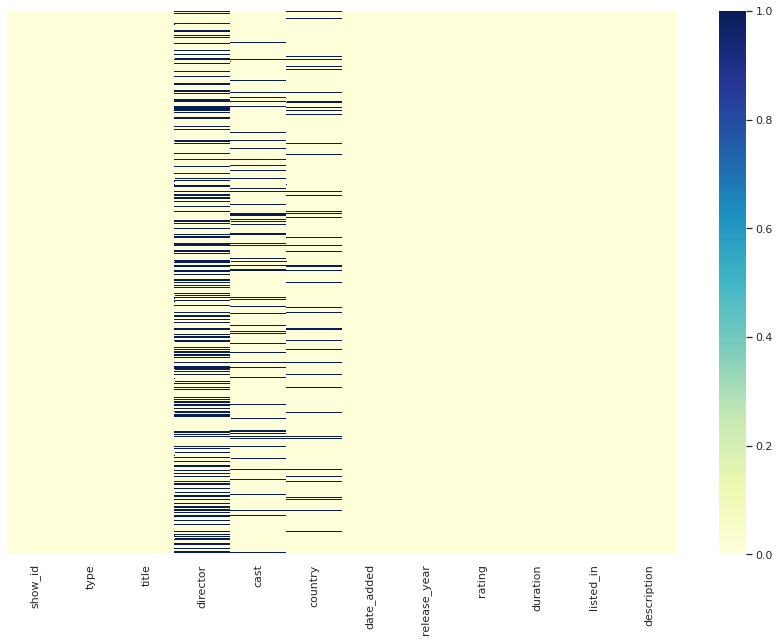

In [ ]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='YlGnBu')

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("Unique values of",i,"is",df[i].nunique())

Unique values of show_id is 7787
Unique values of type is 2
Unique values of title is 7787
Unique values of director is 4049
Unique values of cast is 6831
Unique values of country is 681
Unique values of date_added is 1565
Unique values of release_year is 73
Unique values of rating is 14
Unique values of duration is 216
Unique values of listed_in is 492
Unique values of description is 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Replacing null values
df.director.fillna('Not Specified',inplace=True)
df.director = df.director.str.split(', ').tolist()
df.cast.fillna('Not Specified',inplace=True)
df.cast = df.cast.str.split(', ').tolist()
df.country.fillna('Other',inplace=True)
df.country = df.country.str.split(', ').tolist()

In [ ]:
#keeping only primary values
for i in ['director','cast','country']:
  for j in range(len(df[i])):
    df[i][j]=df[i][j][0]

In [ ]:
df['date_added'].fillna(value=df['date_added'].mode()[0],inplace=True)

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

In [ ]:
df['rating'].fillna(value=df['rating'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [ ]:
df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')
df['duration']=df['duration'].str.replace('min','')
df['duration']=df['duration'].astype(str).astype(int)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,Not Specified,João Miguel,Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1


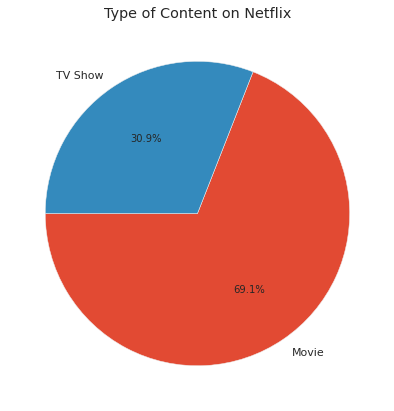

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(13,7))
plt.title("Type of Content on Netflix")
g = plt.pie(df.type.value_counts(), labels=df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
years = list(range(2008,2021,1))
#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.year_added.value_counts()
tv_counts = tv_rows.year_added.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov].sort_values()
tv_shows = tv_counts[index_years_tv].sort_values()

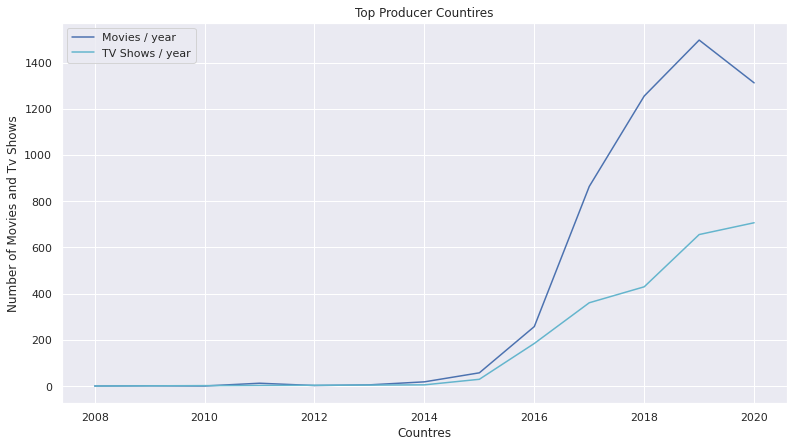

In [ ]:

# Set up the matplotlib figure
plt.figure(figsize=(13,7))
sns.lineplot(data=movies, color="b",label="Movies / year")
sns.lineplot(data=tv_shows, color="c",label="TV Shows / year")
plt.title("Top Producer Countires")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Countres")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
#define years
years = list(range(2008,2021,1))
#separate movies and tv_shows:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov].sort_values()
tv_shows = tv_counts[index_years_tv].sort_values()

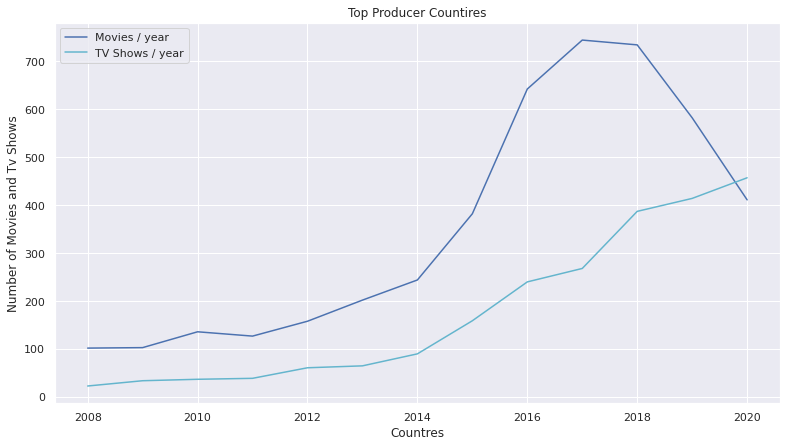

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(13,7))
sns.lineplot(data=movies, color="b",label="Movies / year")
sns.lineplot(data=tv_shows, color="c",label="TV Shows / year")
plt.title("Top Producer Countires")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Countres")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

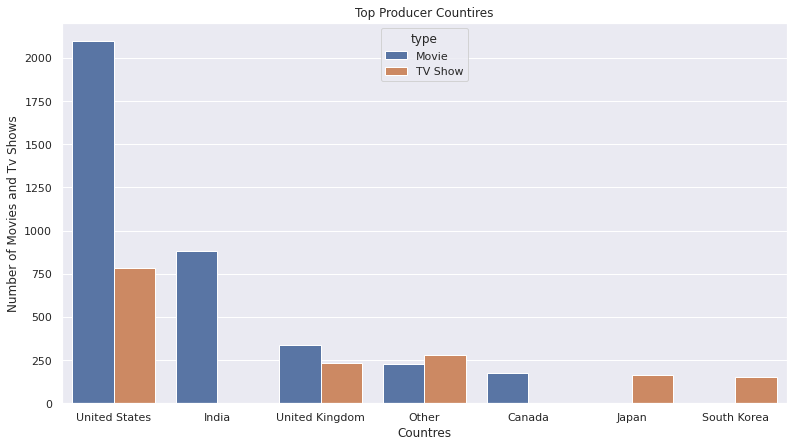

In [ ]:
#Top 5 countries of contents
top5countries= df.groupby(['country','type']).title.count().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(13,7))
sns.barplot(x = 'country', y = 'title',hue='type',ci=None, data = top5countries)
plt.title("Top Producer Countires")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Countres")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

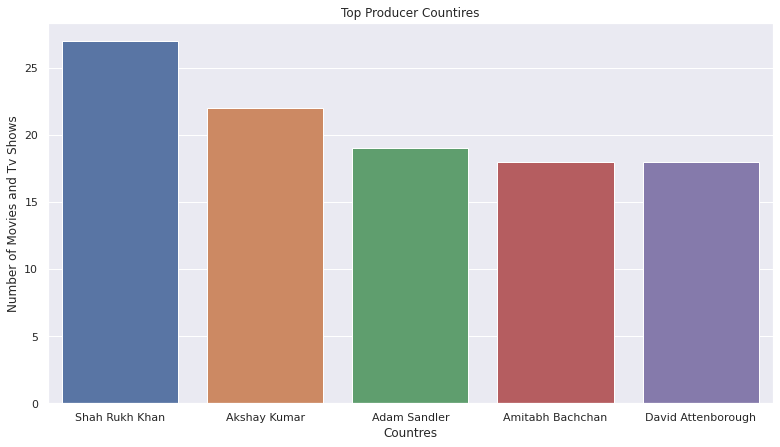

In [ ]:
top5countries= df.cast.value_counts().sort_values(ascending=False).head(6).reset_index().loc[1:]
plt.figure(figsize=(13,7))
sns.barplot(x = 'index', y = 'cast',ci=None, data = top5countries)
plt.title("Top Producer Countires")
plt.ylabel("Number of Movies and Tv Shows")
plt.xlabel("Countres")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

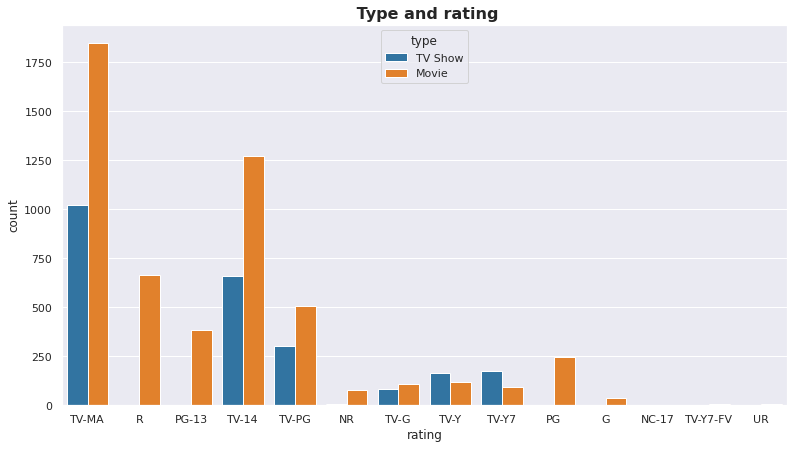

In [ ]:
# Rating
plt.figure(figsize=(13,7))
sns.countplot(x='rating',hue='type',data=df,palette="tab10")
plt.title(' Type and rating',size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

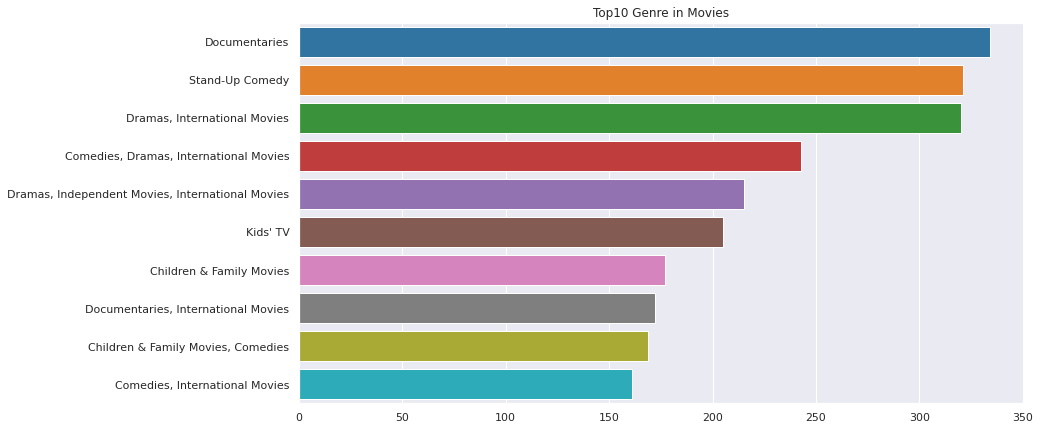

In [ ]:
# Top 10 Genre in movies
plt.figure(figsize=(13,7))
sns.barplot(y = df["listed_in"].value_counts().head(10).index,
            x = df["listed_in"].value_counts().head(10).values,palette="tab10")
plt.title("Top10 Genre in Movies")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

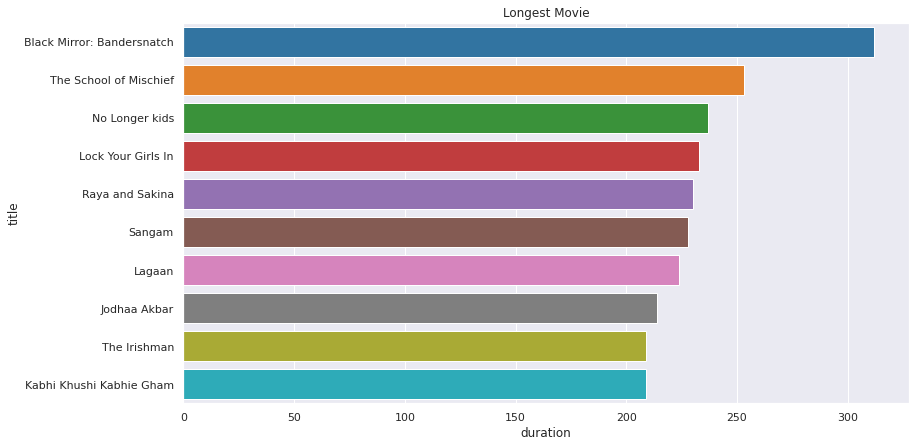

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(data=movie_rows.sort_values(by='duration',ascending=False).head(10), y='title',x='duration',ci=None,palette="tab10") 
plt.title("Longest Movie")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

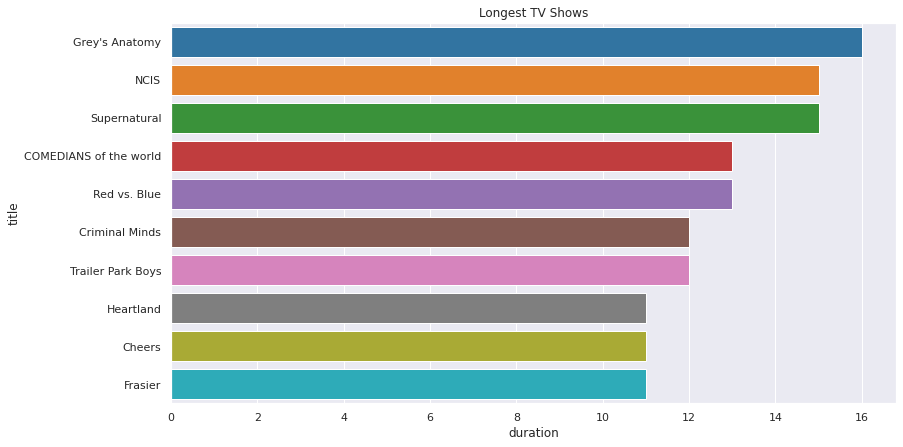

In [ ]:
plt.figure(figsize=(13,7))
sns.barplot(data=tv_rows.sort_values(by='duration',ascending=False).head(10), y='title',x='duration',ci=None,palette="tab10") 
plt.title("Longest TV Shows")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
newdf = df.drop(columns=['show_id',"date_added",'title','director','cast','year_added','release_year','listed_in','duration','country'],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdf["type"] = le.fit_transform(newdf["type"])
newdf['rating'] = le.fit_transform(newdf['rating'])


In [ ]:
newdf.head()

,type,rating,description
0,1,8,In a future where the elite inhabit an island ...
1,0,8,After a devastating earthquake hits Mexico Cit...
2,0,5,When an army recruit is found dead his fellow ...
3,0,4,In a postapocalyptic world ragdoll robots hide...
4,0,4,A brilliant group of students become cardcount...


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
#creating a function for removing punctuation 
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)    

In [ ]:
#removing punctuation from discription column
newdf['description'] = newdf['description'].apply(remove_punctuation)
newdf.head(2)

,type,rating,description
0,1,8,In a future where the elite inhabit an island ...
1,0,8,After a devastating earthquake hits Mexico Cit...


In [ ]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
#removing stopwords from discription
newdf['description'] = newdf['description'].apply(remove_stopwords )
newdf.head(2)

,type,rating,description
0,1,8,future elite inhabit island paradise far crowd...
1,0,8,devastating earthquake hits mexico city trappe...


In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(newdf['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = dict(count_vectorizer.vocabulary_.items())

In [ ]:
# Store the count in panadas dataframe with vocab as index
wordcount = pd.DataFrame({"Word": dictionary.keys() , "count" :dictionary.values()}).sort_values("count",ascending=False)

In [ ]:
wordcount.head()

,Word,count
18869,şeref,19607
10401,ōarai,19606
12385,łukasz,19605
11110,überelite,19604
11681,über,19603


<BarContainer object of 20 artists>

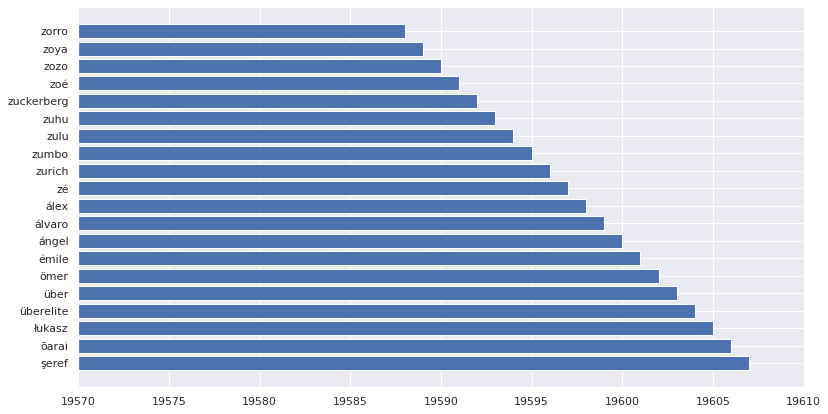

In [ ]:
plt.figure( figsize = ( 13,7 ))
plt.xlim(19570, 19610)
plt.barh((wordcount.head(20).Word.values),(wordcount.head(20)['count'].values))

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")
     
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     
#Stemming for description
newdf['description'] = newdf['description'].apply( stemming )
newdf.head(2)
     

,type,rating,description
0,1,8,futur elit inhabit island paradis far crowd sl...
1,0,8,devast earthquak hit mexico citi trap survivor...


In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(newdf['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = dict(tfid_vectorizer.vocabulary_.items())

In [ ]:
# Store the count in panadas dataframe with vocab as index
wordcount = pd.DataFrame({"Word": dictionary.keys() , "count" :dictionary.values()}).sort_values("count",ascending=False)

In [ ]:
(wordcount.head(20).Word.values)

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu',
       'zuckerberg', 'zoé', 'zozo', 'zoya', 'zorro'], dtype=object)

In [ ]:
(wordcount.head(20)['count'].values)

array([14252, 14251, 14250, 14249, 14248, 14247, 14246, 14245, 14244,
       14243, 14242, 14241, 14240, 14239, 14238, 14237, 14236, 14235,
       14234, 14233])

<BarContainer object of 20 artists>

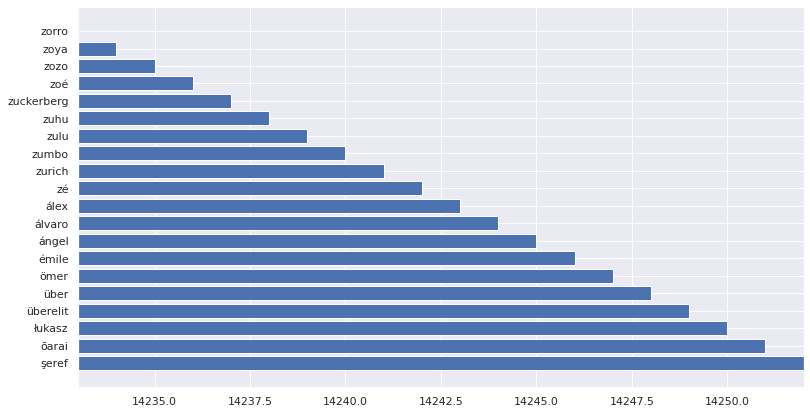

In [ ]:
plt.figure( figsize = ( 13,7 ))
plt.xlim(14233, 14252)
plt.barh((wordcount.head(20).Word.values),(wordcount.head(20)['count'].values))

In [ ]:

#creating new column name length
newdf['descriptionlength'] = newdf['description'].apply(lambda x: len(x))
newdf.head()

,type,rating,description,descriptionlength
0,1,8,futur elit inhabit island paradis far crowd sl...,82
1,0,8,devast earthquak hit mexico citi trap survivor...,88
2,0,5,armi recruit found dead fellow soldier forc co...,102
3,0,4,postapocalypt world ragdol robot hide fear dan...,89
4,0,4,brilliant group student becom cardcount expert...,99


# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
#Getting features
x_features = newdf[['type','rating','descriptionlength']]
x_features.head()

,type,rating,descriptionlength
0,1,8,82
1,0,8,88
2,0,5,102
3,0,4,89
4,0,4,99


In [ ]:
#scaling x features
stdscaler = preprocessing.StandardScaler()
x=stdscaler.fit_transform(x_features)

In [ ]:

#store silhouette score corresponding no. of clusters
no_cluster_silhouette_score = {}
     

For n_clusters = 2 The average silhouette_score is : 0.4176097990982944
For n_clusters = 3 The average silhouette_score is : 0.3991506024976914
For n_clusters = 4 The average silhouette_score is : 0.38326044921010227
For n_clusters = 5 The average silhouette_score is : 0.3635568621266572
For n_clusters = 6 The average silhouette_score is : 0.356728503528789
For n_clusters = 7 The average silhouette_score is : 0.3584925324484504
For n_clusters = 8 The average silhouette_score is : 0.3691445497102827
For n_clusters = 9 The average silhouette_score is : 0.37435556644274354
For n_clusters = 10 The average silhouette_score is : 0.38035440594147313
For n_clusters = 11 The average silhouette_score is : 0.3745622200103998
For n_clusters = 12 The average silhouette_score is : 0.37070078591618294
For n_clusters = 13 The average silhouette_score is : 0.37331739314095597
For n_clusters = 14 The average silhouette_score is : 0.3849045978940014
For n_clusters = 15 The average silhouette_score is : 0

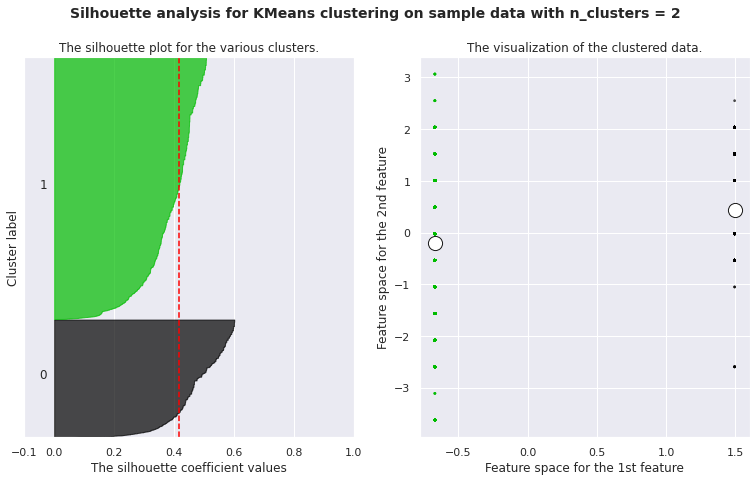

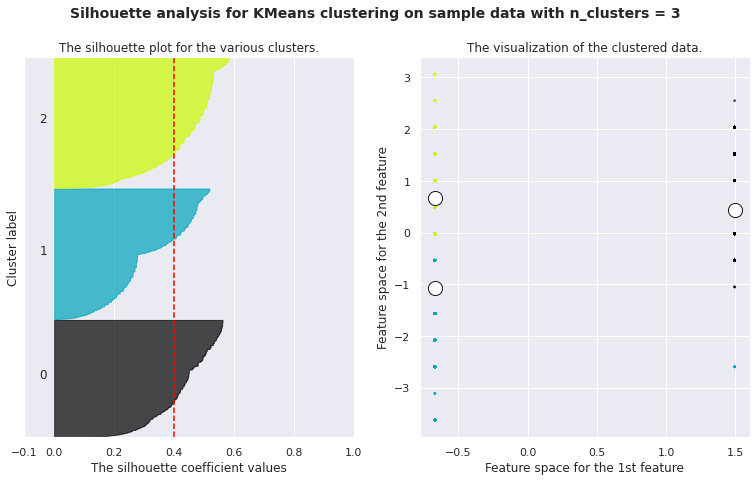

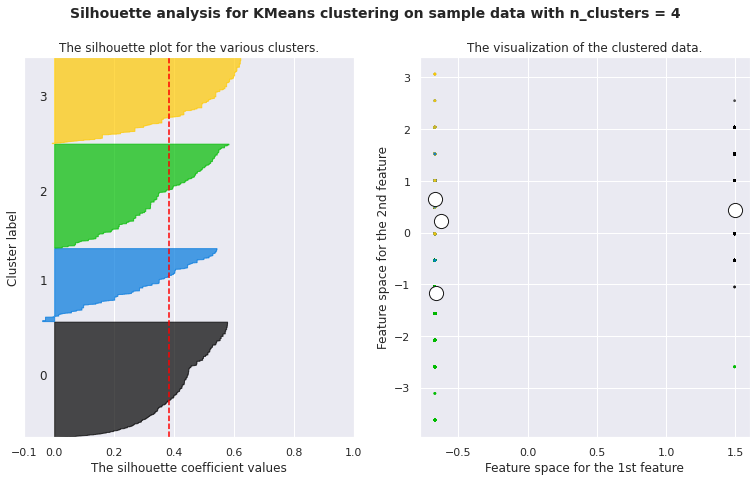

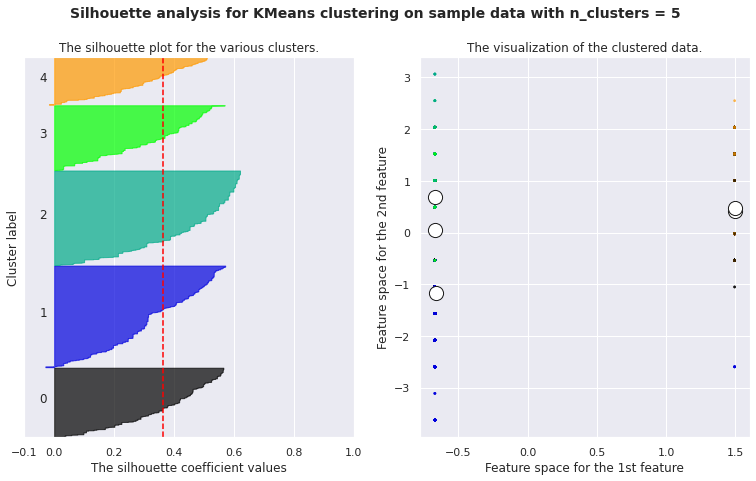

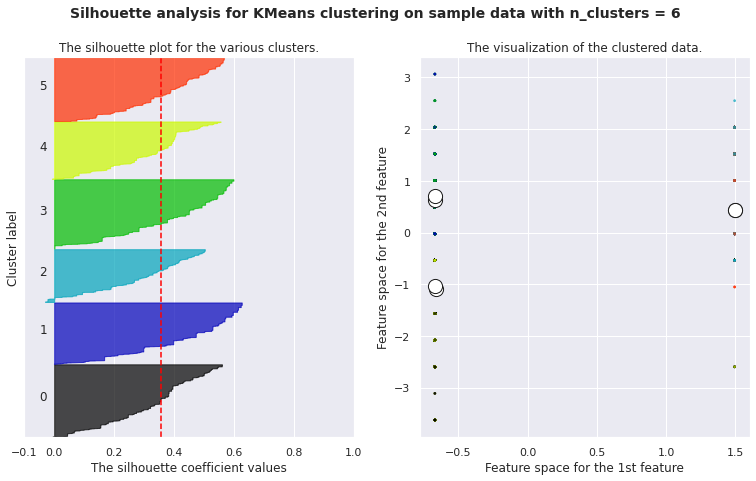

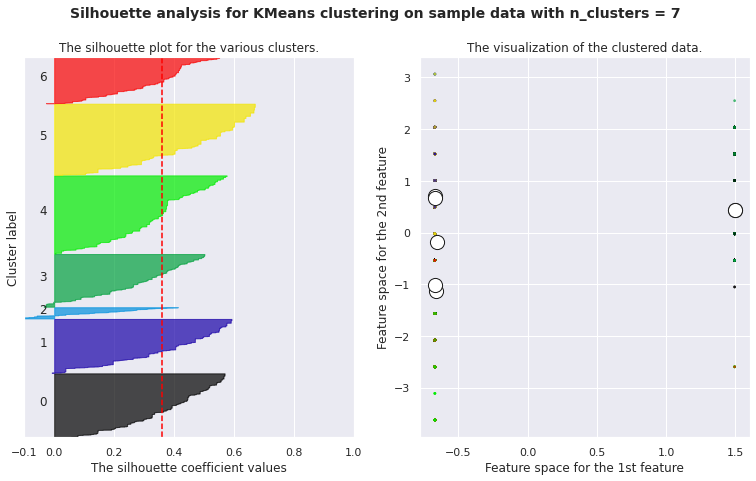

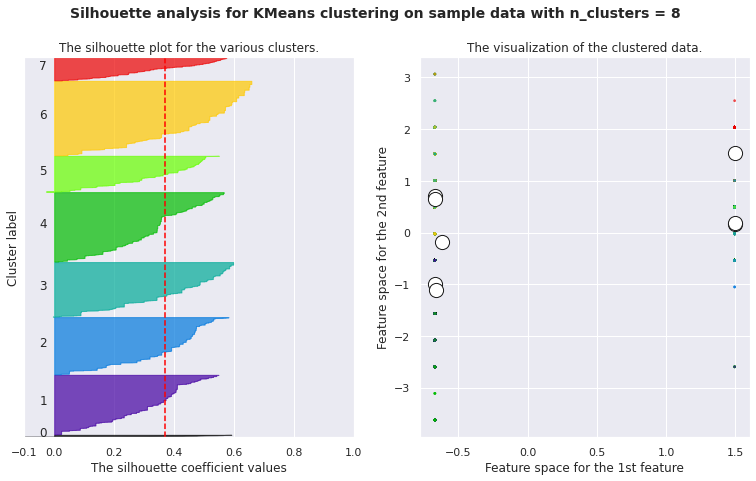

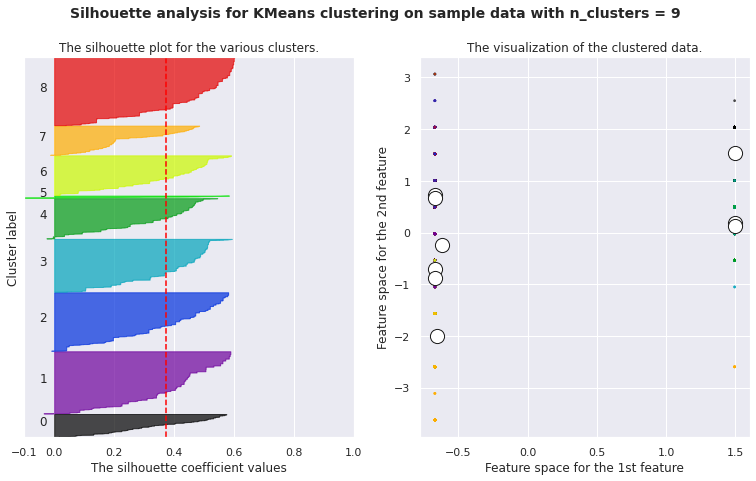

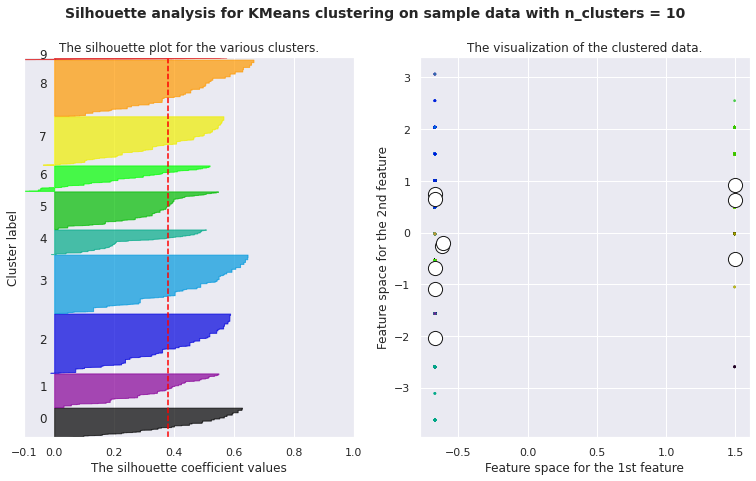

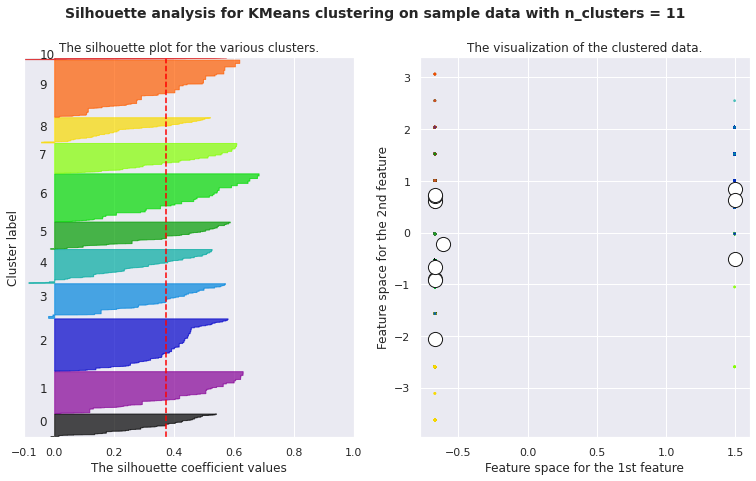

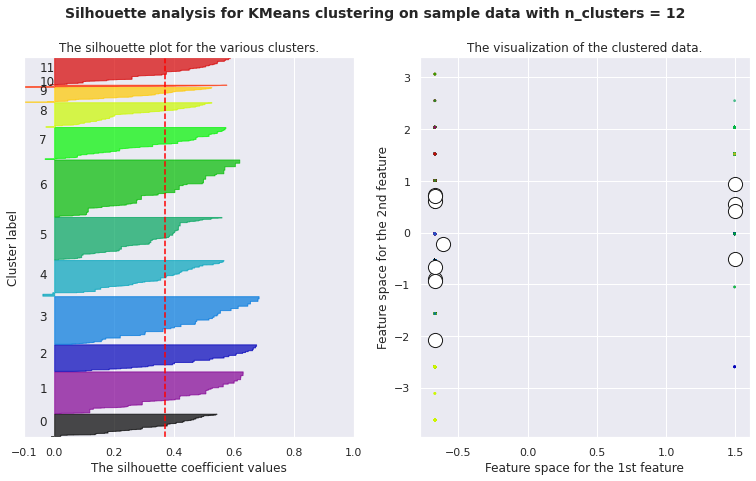

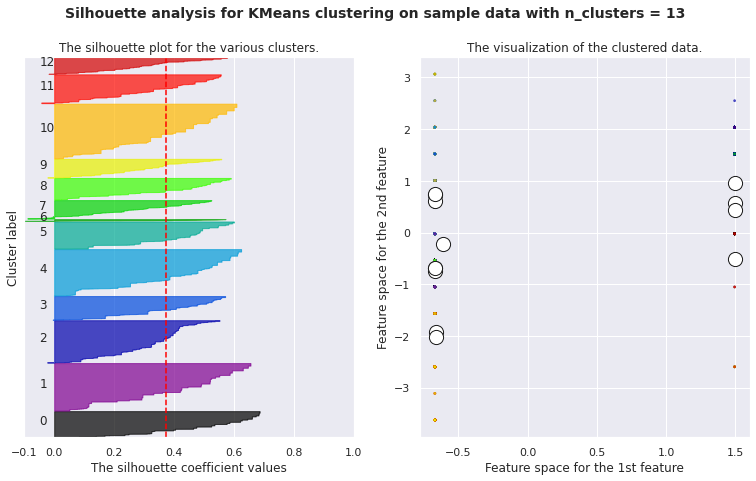

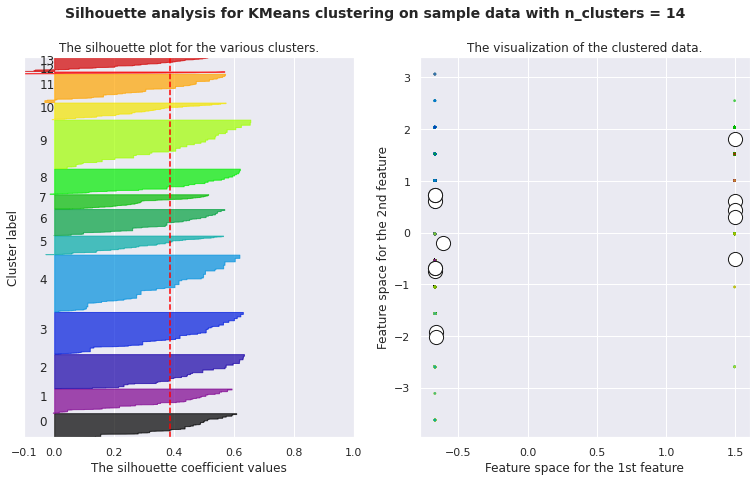

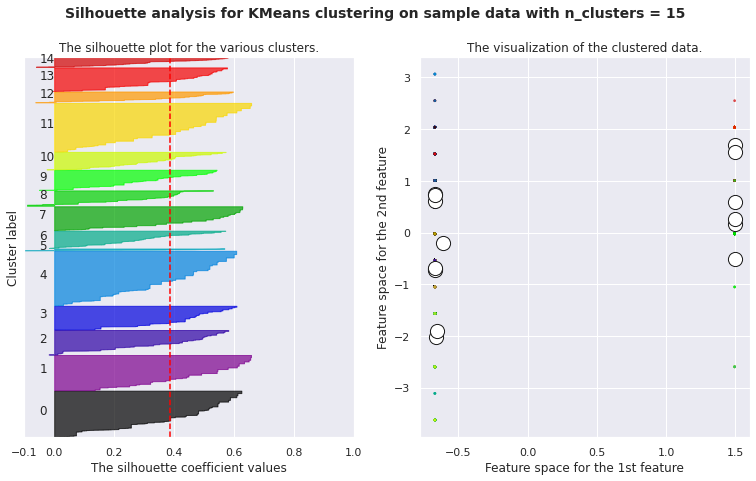

In [ ]:
#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,16))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    no_cluster_silhouette_score[n_clusters] = round(silhouette_avg,3)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
     # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=''.format(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from prettytable import PrettyTable
columns = ['n_clusters','silhouette_score']                                #column_names 
myTable = PrettyTable()                                                    #creating object
myTable.add_column(columns[0],list(no_cluster_silhouette_score.keys()))    #n_clusters
myTable.add_column(columns[1],list(no_cluster_silhouette_score.values()))  #silhouette score
print(myTable)

+------------+------------------+
| n_clusters | silhouette_score |
+------------+------------------+
|     2      |      0.418       |
|     3      |      0.399       |
|     4      |      0.383       |
|     5      |      0.364       |
|     6      |      0.357       |
|     7      |      0.358       |
|     8      |      0.369       |
|     9      |      0.374       |
|     10     |       0.38       |
|     11     |      0.375       |
|     12     |      0.371       |
|     13     |      0.373       |
|     14     |      0.385       |
|     15     |      0.385       |
+------------+------------------+


### ML Model - 2

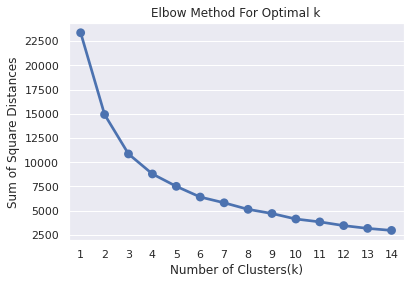

In [ ]:
#Elbow Method For Optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

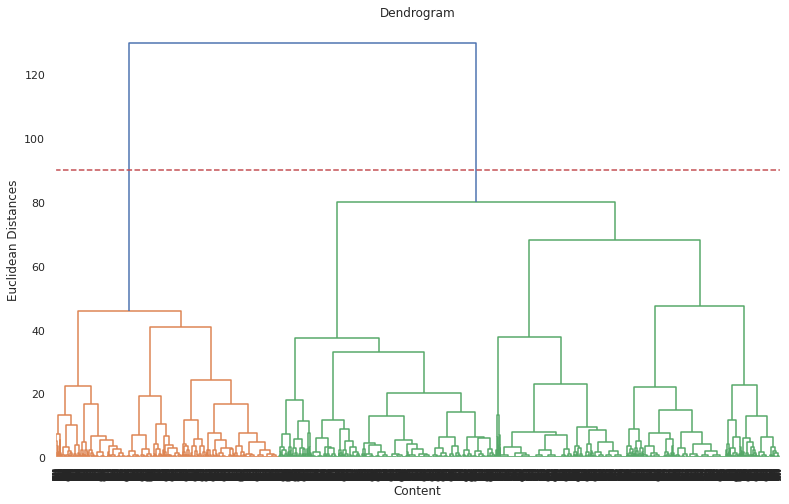

In [ ]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=90,color='r', linestyle='--')
plt.show()                                # find largest vertical distance we can make without crossing any other horizontal line
     

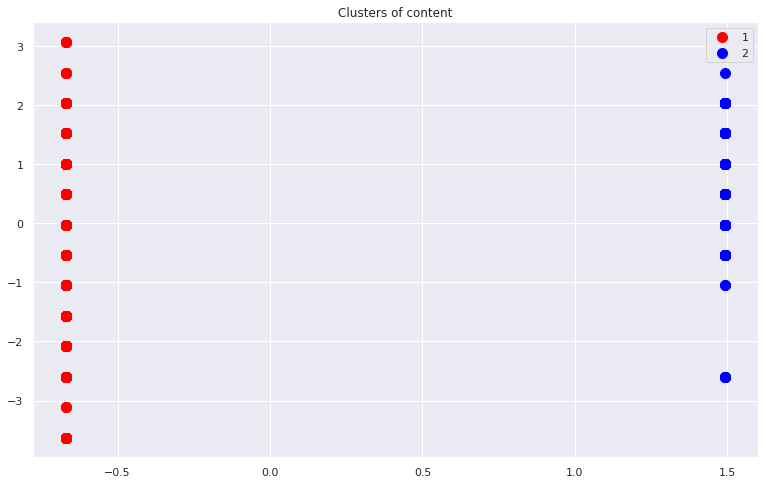

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
     

# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = '2')

plt.title('Clusters of content')

plt.legend()
plt.show()
     

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***